In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm_notebook
from itertools import product

import scipy.sparse.linalg as spsplin

import warnings
warnings.filterwarnings("ignore")

import pandas as pd


## Сетка

In [1]:
"""
Creating and plotting unstructured triangular grids.
"""
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

<Figure size 396x396 with 0 Axes>

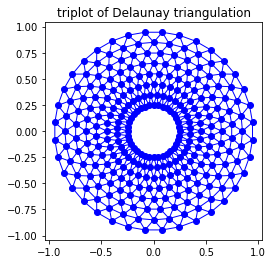

In [4]:
plt.figure(figsize=(5.5, 5.5))
# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-', lw=1)
plt.title('triplot of Delaunay triangulation')


# # You can specify your own triangulation rather than perform a Delaunay
# # triangulation of the points, where each triangle is given by the indices of
# # the three points that make up the triangle, ordered in either a clockwise or
# # anticlockwise manner.

# xy = np.asarray([
#     [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
#     [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
#     [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
#     [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
#     [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
#     [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
#     [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
#     [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
#     [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
#     [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
#     [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
#     [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
#     [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
#     [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
#     [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
#     [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
#     [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
#     [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
#     [-0.077, 0.990], [-0.059, 0.993]])
# x = np.degrees(xy[:, 0])
# y = np.degrees(xy[:, 1])

# triangles = np.asarray([
#     [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
#     [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
#     [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
#     [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
#     [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
#     [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
#     [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
#     [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
#     [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
#     [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
#     [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
#     [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
#     [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
#     [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
#     [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
#     [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

# # Rather than create a Triangulation object, can simply pass x, y and triangles
# # arrays to triplot directly.  It would be better to use a Triangulation object
# # if the same triangulation was to be used more than once to save duplicated
# # calculations.
# plt.figure()
# plt.gca().set_aspect('equal')
# plt.triplot(x, y, triangles, 'go-', lw=1.0)
# plt.title('triplot of user-specified triangulation')
# plt.xlabel('Longitude (degrees)')
# plt.ylabel('Latitude (degrees)')

# plt.show()

In [28]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d, Delaunay

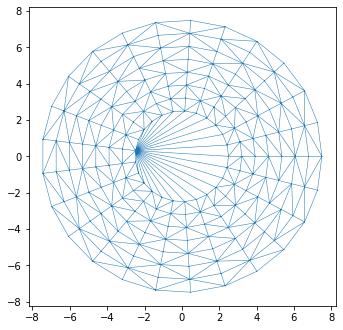

In [54]:
NTheta = 26
NR = 8
a0 = 2.5

plt.figure(figsize=(5.5, 5.5))

#define base rectangle (r,theta) = (u,v)
u=np.linspace(0, 2*np.pi, NTheta)
v=np.linspace(1*a0, 3*a0, NR)
u,v=np.meshgrid(u,v)
u=u.flatten()
v=v.flatten()

#evaluate the parameterization at the flattened u and v
x=v*np.cos(u)
y=v*np.sin(u)

#define 2D points, as input data for the Delaunay triangulation of U
# points2D=np.vstack([u,v]).T
xy0 = np.vstack([x,y]).T

# Tri1 = Delaunay(points2D) #triangulate the rectangle U
Tri2 = Delaunay(xy0) #triangulate the annulus

# plt.scatter(x, y)
# plt.triplot(x, y, Tri1.simplices, linewidth=0.5)
plt.triplot(x, y, Tri2.simplices, linewidth=0.5)

In [95]:

NTheta = 26
NR = 5
a0 = 1

u=np.linspace(0, 2*np.pi, NTheta)
v=np.linspace(1*a0, 3*a0, NR)
u,v=np.meshgrid(u,v)
u=u.flatten()
v=v.flatten()

x=v*np.cos(u)
y=v*np.sin(u)

m1, m2 = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
m1=m1.flatten()
m2=m2.flatten()
m = np.vstack([m1,m2]).T
xy = np.vstack([x,y]).T
res = np.vstack((m, xy))
Tri = Delaunay(res)
# xy.shape

(-5.0, 5.0)

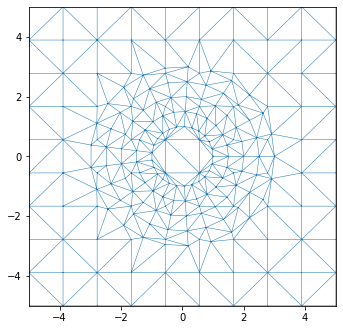

In [96]:
plt.figure(figsize=(5.5, 5.5))

# plt.scatter(x, y)
# plt.triplot(x, y, Tri1.simplices, linewidth=0.5)
plt.triplot(res[:, 0], res[:, 1], Tri.simplices, linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## Предобработка

In [2]:
def mesh_download(name):
    with open(name) as file:
        allfile = file.readlines()

    # Точки собираем
    for i, val in enumerate(allfile):
        if val == '*NODE\n':
            answer = allfile[i:]
            for i, val in enumerate(answer):
                if val =='$\n':
                    answer = answer[:i]
                    break

    points = np.zeros((len(answer[2:]), 3))
    for i, elem in enumerate(answer[2:]):
        points[i] = [float(val) for val in elem.split(' ') if val != ''][:3]

    points = {int(points[i,0]): (points[i,1], points[i,2]) for i in range(len(points))}

    #  Треугольники собираем
    for i, val in enumerate(allfile):
        if val == '*ELEMENT_SHELL\n':
            answer = allfile[i:]
            for i, val in enumerate(answer):
                if val =='*END\n':
                    answer = answer[:i]
                    break

    triang = np.zeros((len(answer[1:]), 4))
    for i, elem in enumerate(answer[1:]):
        triang[i] = [i+1] + [val for val in elem.split(' ') if val != ''][2:5]
    triang = triang.astype('int')
    triang = {triang[i,0]: (triang[i,1], triang[i,2], triang[i,3]) for i in range(len(triang))}
    
    return points, triang

In [3]:
points, triang = mesh_download('answer_hw.k')

## Построение графа через networkX

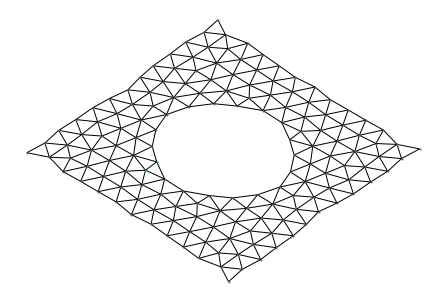

In [3]:
def add_edge(f_item, s_item, weight, graph):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item) 
    
graph = nx.Graph()
    
for i, val in triang.items():
    for k1,k2 in ((0,1),(1,2),(2,0)):
        point1, point2 = points[val[k1]], points[val[k2]]
        weight = ((point1[0] - point2[0])**2 + (point1[0] - point2[0])**2)**0.5
        add_edge(val[k1], val[k2], weight, graph)
        
nx.set_node_attributes(graph, 'coord', frozenset(points.items()))

nx.draw_kamada_kawai(graph, node_size=1)

## Построение сетки в лоб

In [3]:
def plot_triang(i, color='green'):
    t1, t2, t3 = triang[i]
    x , y = list(zip(points[t1],points[t2]))
    plt.plot(x,y, color)
    x , y = list(zip(points[t2],points[t3]))
    plt.plot(x,y, color)
    x , y = list(zip(points[t3],points[t1]))
    plt.plot(x,y, color)

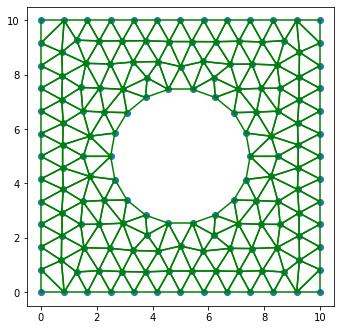

In [5]:
plt.figure(figsize=(5.5, 5.5))    
coord = [i[1] for i in points.items()]
ind = [i[0] for i in points.items()]
x = [i[0] for i in coord]
y = [i[1] for i in coord]
plt.scatter(x, y)

for i in triang.keys():
    plot_triang(i, 'green')

## Принадлежность точки элементу

In [4]:
def line(coord1, coord2, coord):
    return (coord1[1] - coord2[1]) * coord[0] + (coord2[0] - coord1[0]) * coord[1] + (coord1[0] * coord2[1] -
                                                                              coord1[1] * coord2[0])

def triang_true(i, coord):
    t1, t2, t3 = triang[i]
    coord1, coord2, coord3 = points[t1], points[t2], points[t3]
    res1, res2, res3 = line(coord1, coord2, coord), line(coord2, coord3, coord), line(coord3, coord1, coord)

    if (res1 < 0 or np.isclose(res1, 0)) and (res2 < 0 or 
                                              np.isclose(res2, 0)) and (res3 < 0 or np.isclose(res3, 0)):
        return True
    return False
    

### 1. Brute

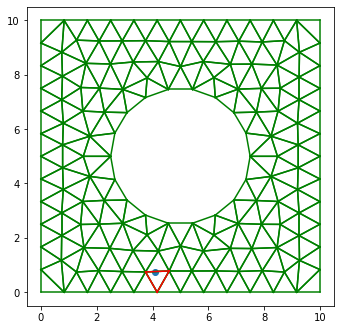

In [7]:
plt.figure(figsize=(5.5, 5.5)) 
x = np.random.random() * 10
y = np.random.random() * 10
while (x-5)**2 + (y-5)**2 < 2.5**2:
    x = np.random.random() * 10
    y = np.random.random() * 10

for i in triang.keys():
    plot_triang(i)
plt.scatter(x, y)

for i in triang.keys():
    if triang_true(i, (x, y)):
        plot_triang(i, 'red')
        break

### 2. KNN

In [8]:
centroids = np.zeros((len(triang), 2))
target = np.arange(len(triang))
for i in triang.keys():
    t1, t2, t3 = triang[i]
    t1, t2, t3 = points[t1], points[t2], points[t3]
    centroids[i-1,0] = (t1[0] + t2[0] + t3[0])/3
    centroids[i-1,1] = (t1[1] + t2[1] + t3[1])/3

In [9]:
model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
model.fit(centroids, target)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

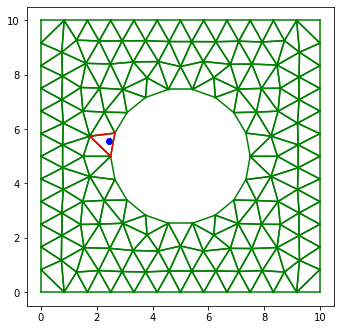

In [10]:
plt.figure(figsize=(5.5, 5.5)) 
x = np.random.random() * 10
y = np.random.random() * 10
while (x-5)**2 + (y-5)**2 < 2.5**2:
    x = np.random.random() * 10
    y = np.random.random() * 10

ind = model.kneighbors([[x, y]], 7, False).ravel() + 1

for i in triang.keys():
    plot_triang(i)
plt.scatter(x, y, c='blue')


for i in ind:
    if triang_true(i, (x, y)):
        plot_triang(i, 'red')
        break
else:
    for i in triang.keys():
        if triang_true(i, (x, y)):
            plot_triang(i, 'red')
            break

## Тест качества

In [10]:
k = 0
for _ in tqdm_notebook(range(100000)):
    x = np.random.random() * 10
    y = np.random.random() * 10
    while (x-5)**2 + (y-5)**2 < 2.5**2:
        x = np.random.random() * 10
        y = np.random.random() * 10

    ind = model.kneighbors([[x, y]], 7, False).ravel() + 1

    for i in ind:
        if triang_true(i, (x, y)):
            k += 1
            break
            
print(k)


100000


## Посмотрим время работы двух алгоритмов

In [11]:
def f1():
    ind = model.kneighbors([[x, y]], 7, False).ravel() + 1
    for i in ind:
        if triang_true(i, (x, y)):
            break
    
def f2():
    for i in triang.keys():
        if triang_true(i, (x, y)):
            break
    

In [12]:
x = np.random.random() * 10
y = np.random.random() * 10
while (x-5)**2 + (y-5)**2 < 2.5**2:
    x = np.random.random() * 10
    y = np.random.random() * 10

In [13]:
%timeit f1()

662 µs ± 76.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%timeit f2()

13.3 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Построение интерполяции

In [186]:
def func_trig(x, y):
    return np.sin(x) + np.cos(y)

points_value_trig = {}
for i, val in points.items():
    points_value_trig[i] = func_trig(val[0], val[1])

In [187]:
def func_plane(x, y):
    return x + y

points_value_plane = {}
for i, val in points.items():
    points_value_plane[i] = func_plane(val[0], val[1])

In [6]:
def interpol_func(ind, points_value):
    point_i, point_j, point_k = triang[ind]
    F = points_value[point_i], points_value[point_j], points_value[point_k]
    (X_i, Y_i), (X_j, Y_j), (X_k, Y_k) = points[point_i], points[point_j], points[point_k]
    X = (X_i, X_j, X_k)
    Y = (Y_i, Y_j, Y_k)
    b_ = [Y[i%3] - Y[(i+1)%3] for i in range(1, 4)]
    c_ = [-X[i%3] + X[(i+1)%3] for i in range(1, 4)]
    a_ = [X[i%3] * Y[(i+1)%3] - X[(i+1)%3] * Y[i%3] for i in range(1, 4)]
    A = np.linalg.det(np.array([[1, X_i, Y_i],
                               [1, X_j, Y_j],
                               [1, X_k, Y_k]]))
    N_ = []
    for i in range(3):
        N_.append(lambda x, y, i=i: (a_[i] + b_[i] * x + c_[i] * y) / A)
    return lambda x, y: sum([N_[i](x, y) * F[i] for i in range(3)])

### Проверка значений

In [12]:
ind = 4
f = interpol_func(ind, points_value_trig)
point_i, point_j, point_k = triang[ind]
print('points :', points[point_i], points[point_j], points[point_k])
print('true values :', points_value_trig[point_i], points_value_trig[point_j], points_value_trig[point_k])
print('values of interpol_func:', f(*points[point_i]), f(*points[point_j]), f(*points[point_k]))

points : (0.0, 8.33333) (0.7721, 7.94801) (0.0, 7.5)
true values : -0.4612010815135996 0.6037514437097696 0.3466353178350258
values of interpol_func: -0.46120108151359995 0.6037514437097696 0.34663531783502605


## Смотрим точность

In [13]:
def find_value(x, y, points_value):
    if (x-5)**2 + (y-5)**2 < 2.5**2:
        return 0
    ind = model.kneighbors([[x, y]], 7, False).ravel() + 1
    for i in ind:
        if triang_true(i, (x, y)):
            return interpol_func(i, points_value)(x, y)
    else:
        for i in triang.keys():
            if triang_true(i, (x, y)):
                return interpol_func(i, points_value)(x, y)
            
def true_value(x, y, func):
    if (x-5)**2 + (y-5)**2 < 2.5**2:
        return 0
    return func(x, y)

In [18]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

plane_error = np.max([np.abs(find_value(x_i, y_i, points_value_plane) - true_value(x_i, y_i, func_plane))
                       for x_i, y_i in tqdm_notebook(product(x, y))])
trig_error = np.max([np.abs(find_value(x_i, y_i, points_value_trig) - true_value(x_i, y_i, func_trig)) 
                       for x_i, y_i in tqdm_notebook(product(x, y))])
print(f'plane abs error : {plane_error}\ntrig abs error : {trig_error}\n')

plane_error = np.mean([(find_value(x_i, y_i, points_value_plane) - true_value(x_i, y_i, func_plane))**2 
                       for x_i, y_i in tqdm_notebook(product(x, y))])
trig_error = np.mean([(find_value(x_i, y_i, points_value_trig) - true_value(x_i, y_i, func_trig))**2 
                       for x_i, y_i in tqdm_notebook(product(x, y))])
print(f'plane abs error : {plane_error}\ntrig abs error : {trig_error}\n')


plane abs error : 5.471179065352771e-13
trig abs error : 0.1565073326749402




plane abs error : 8.154324172125145e-27
trig abs error : 0.0024482583416917075



## Строим матрицу жесткости

In [5]:
points, triang = mesh_download('answer_part.k')

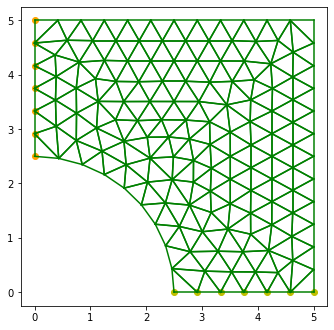

In [6]:
plt.figure(figsize=(5.5, 5.5))    
coord = [i[1] for i in points.items()]
ind = [i[0] for i in points.items()]
x = [i[0] for i in coord]
y = [i[1] for i in coord]

for i in triang.keys():
    plot_triang(i, 'green')
    
for key, (x,y) in points.items():
    key -= 1
    if np.isclose(x,0):
        plt.scatter(x, y, c='orange')
    
    if np.isclose(y,0):
        plt.scatter(x, y, c='y')

In [39]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)
    
def k_solver():    
    yung = 180
    puass = 0.3
    P = -5
    
    K = np.zeros((2 * len(points), 2 * len(points)))
    F = np.zeros(2 * len(points))
    for _, (point1, point2, point3) in triang.items():
        (x1, y1), (x2, y2), (x3, y3) = points[point1], points[point2], points[point3]
        points_ind = {0:point1 - 1, 1:point2 - 1, 2:point3 - 1}
        delta = abs((x1 - x3) * (y2 - y3) - (x2 - x3) * (y1 - y3)) # delta = square * 2
        B = np.array([[y2 - y3, 0, y3 - y1, 0, y1 - y2, 0],
                     [0, x3 - x2, 0, x1 - x3, 0, x2 - x1],
                     [x3 - x2, y2 - y3, x1 - x3, y3 - y1, x2 - x1, y1 - y2]]) / delta
        
                
        D = np.array([[1, puass / (1 - puass), 0],
                     [puass / (1 - puass), 1, 0],
                     [0, 0, (1 - 2 * puass) / (2 - 2 * puass)]])
        D *= yung * (1 - puass) / (1 + puass) / (1 - 2 * puass)
        
        k_loc = B.T @ D @ B * delta / 2
        for ind in product(range(0, 6, 2), range(0, 6, 2)):
            ind1 = points_ind[ind[0]//2]
            ind2 = points_ind[ind[1]//2]
            K[ind1*2:ind1*2+2, ind2*2:ind2*2+2] += k_loc[ind[0]:ind[0]+2, ind[1]:ind[1]+2]

        
        # Задание нагрузок
        for i in range(2):
            for j in range(i+1, 3):
                ind1 = points_ind[i]
                ind2 = points_ind[j]
                coord1, coord2 = points[ind1 + 1], points[ind2 + 1] 
                if np.isclose(coord1[1] * coord2[1], 25):
                    F[[2*ind1 + 1, 2*ind2 + 1]] += P * abs(coord1[0] - coord2[0])
           
    #Граничные условия на перемещения
    for ind, (x, y) in points.items():
        ind -= 1
        if np.isclose(x, 0):
            K[2*ind] = 0
            K[:, 2*ind] = 0
            K[2*ind, 2*ind] = 1
            F[2*ind] = 0
            
        if np.isclose(y, 0):
            K[2*ind+1] = 0
            K[:, 2*ind+1] = 0
            K[2*ind+1, 2*ind+1] = 1
            F[2*ind+1] = 0
        
#     print('Time of usual solver')                
#     %timeit np.linalg.solve(K, F)
#     print('Error :', np.linalg.norm(K @ np.linalg.solve(K, F) - F), '\n')
    
#     print('Time of CG') 
#     %timeit spsplin.cg(K, F)
#     res_hist = []
#     U, info = spsplin.cg(K, F, callback=lambda x: res_hist.append(K @ x - F), tol=1e-10)
#     print(info, len(res_hist))
#     print('Error :', np.linalg.norm(K @ U - F), '\n')
    
#     n = K.shape[0]
#     invA_approx = spsplin.spilu(K, drop_tol=1e-5)
#     print('Time of ILU')
#     %timeit spsplin.spilu(K, drop_tol=1e-5)
#     ilu_prec = lambda x: invA_approx.solve(x)
#     res_hist = []
#     U = spsplin.cg(K, F, callback=lambda x: res_hist.append(x.copy()), M=spsplin.LinearOperator((n,n), matvec=ilu_prec))[0]
#     print('Time of CG with ILU')
#     %timeit spsplin.cg(K, F, callback=lambda x: res_hist.append(x.copy()), M=spsplin.LinearOperator((n,n), matvec=ilu_prec))[0]
#     print('Error :', np.linalg.norm(K @ U - F), '\n')
    
    U = np.linalg.solve(K, F)
    print('Error :', np.linalg.norm(K @ U - F), '\n')
    
    return U




In [40]:
U = k_solver()

Error : 7.868170862480011e-13 



In [41]:
def deform_napr(U):    
    yung = 180
    puass = 0.3
    deform = {}
    napr = {}
    
    for key, (point1, point2, point3) in triang.items():
        (x1, y1), (x2, y2), (x3, y3) = points[point1], points[point2], points[point3]
        points_ind = {0:point1 - 1, 1:point2 - 1, 2:point3 - 1}
        delta = abs((x1 - x3) * (y2 - y3) - (x2 - x3) * (y1 - y3)) # delta = square * 2
        B = np.array([[y2 - y3, 0, y3 - y1, 0, y1 - y2, 0],
                     [0, x3 - x2, 0, x1 - x3, 0, x2 - x1],
                     [x3 - x2, y2 - y3, x1 - x3, y3 - y1, x2 - x1, y1 - y2]]) / delta
        
                
        D = np.array([[1, puass / (1 - puass), 0],
                     [puass / (1 - puass), 1, 0],
                     [0, 0, (1 - 2 * puass) / (2 - 2 * puass)]])
        D *= yung * (1 - puass) / (1 + puass) / (1 - 2 * puass)
        
        ind = [2*(point1-1), 2*(point1-1)+1, 2*(point2-1), 2*(point2-1)+1, 2*(point3-1), 2*(point3-1)+1] 
        deform[key] = B @ U[ind]
        napr[key] = D @ deform[key]
        
    
    
    return deform, napr
             

In [42]:
# deform, napr = deform_napr(U1.ravel())
deform, napr = deform_napr(U)
# U1.ravel()

In [34]:
napr[100]

array([ -3.31119769, -21.02171284,  -0.33011482])

In [36]:
def get_napryzh_to_axes_and_colors(napryazh_vs_id):
    eps = 0.001
    si_x = []
    si_y = []
    si_xy = []
    c = []
    for key, val in napryazh_vs_id.items():
        si_x.append(val[0])
        si_y.append(val[1])
        si_xy.append(val[2])

    c.append({'min':min(si_x)-eps, 'max':max(si_x)+eps})
    c.append({'min':min(si_y)-eps, 'max':max(si_y)+eps})
    c.append({'min':min(si_xy)-eps, 'max':max(si_xy)+eps})
    
    return c

In [37]:
def get_napryzh_to_axes_and_colors(napryazh_vs_id):
    si_x = []
    si_y = []
    si_xy = []
    for key, val in napryazh_vs_id.items():
        si_x.append(val[0])
        si_y.append(val[1])
        si_xy.append(val[2])

    c_x = np.linspace(min(si_x), max(si_x), 5)
    c_y = np.linspace(min(si_y), max(si_y), 5)
    c_xy = np.linspace(min(si_xy), max(si_xy), 5)
    
    return c_x, c_y, c_xy

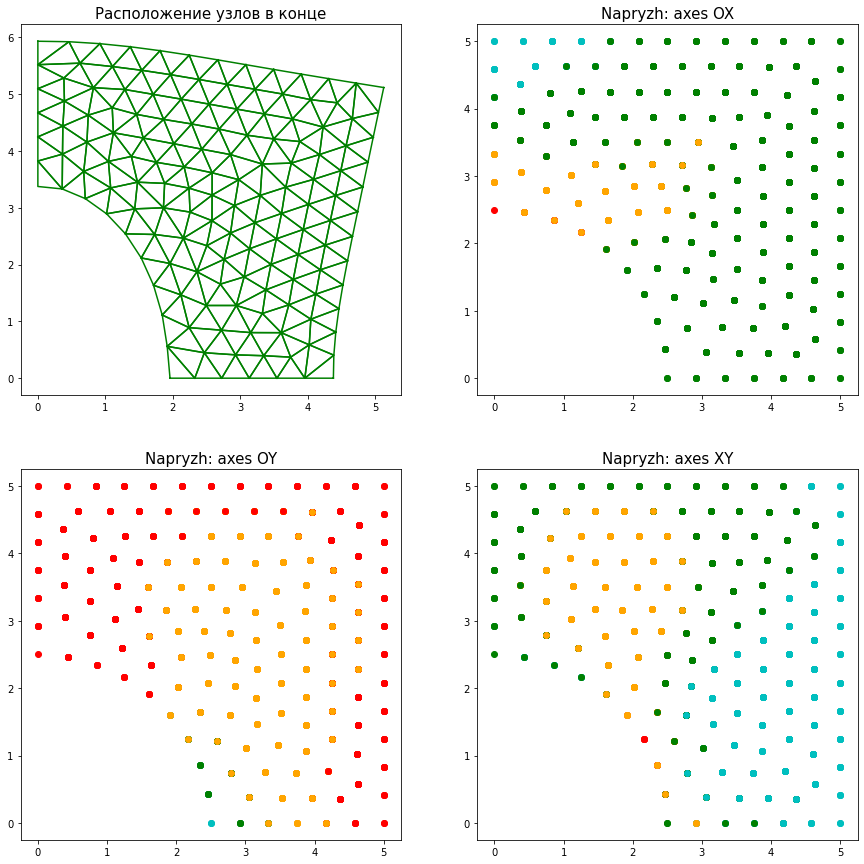

In [38]:
def paint_pls(napryazh_vs_id):
    
    fig = plt.figure(figsize=(15,15))
    
#     c = get_napryzh_to_axes_and_colors(napryazh_vs_id)
    c_x, c_y, c_xy = get_napryzh_to_axes_and_colors(napryazh_vs_id)
    
    color = dict(zip(range(5), ['b', 'c', 'g', 'orange', 'r']))
    
    for key, (point1, point2, point3) in triang.items():
        xx_0 = []
        yy_0 = []
        xx = []
        yy = []
        
        point1_point1 = (point1, point2, point3, point1)
        for point in point1_point1:
            # новые точки
            xx.append(points[point][0] + U[(point-1)*2])
            yy.append(points[point][1] + U[(point-1)*2 + 1])
            # начальное расположение узлов
            xx_0.append(points[point][0])
            yy_0.append(points[point][1])


        
        plt.subplot(2, 2, 1)
        plt.plot(xx, yy, c='green')
        plt.title('Расположение узлов в конце', fontsize=15)
    
#         cc = color[(napryazh_vs_id[key][0] - c[0]['min'])/(c[0]['max'] - c[0]['min']) // 0.2]

        for i in range(4):
            if c_x[i] <= napryazh_vs_id[key][0] <= c_x[i+1]:
                cc = color[i+1]
        
        plt.subplot(2, 2, 2)
#         plt.fill(xx_0, yy_0, c=cc)
        plt.scatter(xx_0, yy_0, c=cc)
        plt.title('Napryzh: axes OX', fontsize=15)
        
        ###########################################
    
#         cc = color[(napryazh_vs_id[key][1] - c[1]['min'])/(c[1]['max'] - c[1]['min']) // 0.2]

        for i in range(4):
            if c_y[i] <= napryazh_vs_id[key][1] <= c_y[i+1]:
                cc = color[i+1]
                
        plt.subplot(2, 2, 3)
#         plt.fill(xx_0, yy_0, c=cc)
        plt.scatter(xx_0, yy_0, c=cc)
        plt.title('Napryzh: axes OY', fontsize=15)
        
        ###################################################
        
#         cc = color[(napryazh_vs_id[key][2] - c[2]['min'])/(c[2]['max'] - c[2]['min']) // 0.2]
        
        for i in range(4):
            if c_xy[i] <= napryazh_vs_id[key][2] <= c_xy[i+1]:
                cc = color[i+1]
            
        plt.subplot(2, 2, 4)
#         plt.fill(xx_0, yy_0, c=cc)
        plt.scatter(xx_0, yy_0, c=cc)
        plt.title('Napryzh: axes XY', fontsize=15)
    plt.show()
    
paint_pls(napr)

In [15]:
napr[100]

array([ 3.31119769, 21.02171284,  0.33011482])

In [16]:
# K1 = pd.read_csv('foo.csv', header=None).values

In [17]:
# np.savetxt("foo.csv", U.reshape((-1,1)), delimiter=",")

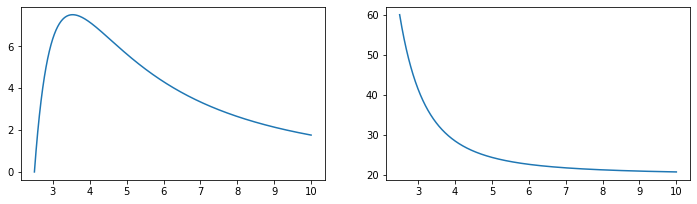

In [29]:
fig = plt.figure(figsize=(12,7))
P = 20
a = 2.5
x = np.linspace(2.5, 10, 1000)
plt.subplot(2, 2, 1)
y = 1.5 * P * ((a / x)**2 - (a / x)**4) # p_{11}
# y = 0.5 * P * (2 - 5 * (a / x) ** 2 + 3 * (a / x)**4)
plt.plot(x, y)
plt.subplot(2, 2, 2)
y = 0.5 * P * (2 + (a / x) ** 2 + 3 * (a / x) ** 4) # p_{22}
plt.plot(x, y)

# лучше не смотри дальше
# plt.subplot(2, 2, 3)
# y = 0.5 * P * (2 - 5 * (a / x) ** 2 + 3 * (a / x)**4)
# plt.plot(x, y)

In [20]:
def napr_val(x, y, napr, axis):
    
    ind = model.kneighbors([[x, y]], 7, False).ravel() + 1
    
        
    for i in ind:
        if triang_true(i, (x, y)):
            return napr[i][axis]
    else:
        for i in triang.keys():
            if triang_true(i, (x, y)):
                return napr[i][axis]

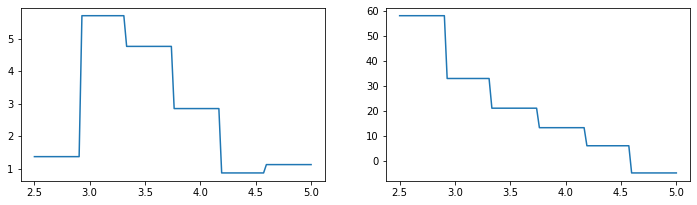

In [44]:
centroids = np.zeros((len(triang), 2))
target = np.arange(len(triang))
for i in triang.keys():
    t1, t2, t3 = triang[i]
    t1, t2, t3 = points[t1], points[t2], points[t3]
    centroids[i-1,0] = (t1[0] + t2[0] + t3[0])/3
    centroids[i-1,1] = (t1[1] + t2[1] + t3[1])/3

model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
model.fit(centroids, target)

fig = plt.figure(figsize=(12,7))
x = np.linspace(2.5, 5, 100)
plt.subplot(2, 2, 1)
y = [napr_val(i, 0, napr, 0) for i in x]
plt.plot(x, y)
plt.subplot(2, 2, 2)
y = [napr_val(i, 0, napr, 1) for i in x]
plt.plot(x, y)

# лучше не смотри дальше
# plt.subplot(2, 2, 3)
# y = [napr_val(0, i, napr, 1) for i in x]
# plt.plot(x, y)

In [115]:
# def napr_val(x, y, napr, axis):
      
#     ind = model.kneighbors([[x, y]], 7, False).ravel() + 1
    
#     for i in ind:
#         if triang_true(i, (x, y)):
#             plot_triang(i, 'yellow')
#             return napr[i][axis]
#     else:
#         for i in triang.keys():
#             if triang_true(i, (x, y)):
#                 return napr[i][axis]
            
# fig = plt.figure(figsize=(5,5))            
# centroids = np.zeros((len(triang), 2))
# target = np.arange(len(triang))
# for i in triang.keys():
#     t1, t2, t3 = triang[i]
#     t1, t2, t3 = points[t1], points[t2], points[t3]
#     centroids[i-1,0] = (t1[0] + t2[0] + t3[0])/3
#     centroids[i-1,1] = (t1[1] + t2[1] + t3[1])/3

# model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
# model.fit(centroids, target)

# for i in triang.keys():
#     plot_triang(i, 'green')
    
    
# x = np.linspace(2.5, 5, 100)           
# [napr_val(i, 0, napr, 0) for i in x];
# # napr_val(x[40], 0, napr, 0)